In [1]:
# Import required libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import shapely.speedups
from fiona.crs import from_epsg
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# File paths
fp_signs = '../data/CleanSigns/signs.csv'


In [3]:
# Create dataframe
df_signs = pd.read_csv(fp_signs)

In [4]:
df_signs.head()

Sign Account Street Number  Street Name Size (LxW)  \
0       44-001     4566-4568  KINGSTON RD    10 x 20   
1       44-001     4566-4568  KINGSTON RD    10 x 20   
2       44-002          4528  KINGSTON RD    10 x 20   
3       44-002          4528  KINGSTON RD    10 x 20   
4       44-002          4528  KINGSTON RD    10 x 20   

                Location Description (if no address)  X Coordinate  \
0  On Kingston Rd. between Military Trail & Morni...     330183.18   
1  On Kingston Rd. between Military Trail & Morni...     330184.17   
2  On Kingston Rd. between Military Trail & Morni...     330055.54   
3  On Kingston Rd. between Military Trail & Morni...     330059.83   
4  On Kingston Rd. between Military Trail & Morni...     330061.23   

   Y Coordinate Sign Type Sign Technology Sign Face Direction Illumination  \
0    4848008.89    Ground          STATIC                   W         Down   
1    4848001.36    Ground          STATIC                   E         Down   
2    4847844.62      Roof          STATIC                  NE           Up   
3    4847841.82      Roof          STATIC                  NE           Up   
4    4847842.89      Roof          STATIC                  SW           Up   

  Sign Owner Sign Owner Identifier  \
0   PATTISON                 5364A   
1   PATTISON                 5364B   
2        CBS                  1633   
3        CBS                  1634   
4        CBS                  1631   

                           Context Picture Hyperlink  Ward_ID  
0  http://maps.live.com/default.aspx?v=2&FORM=LML...       44  
1  http://maps.live.com/default.aspx?v=2&FORM=LML...       44  
2  http://maps.live.com/default.aspx?v=2&FORM=LML...       44  
3  http://maps.live.com/default.aspx?v=2&FORM=LML...       44  
4  http://maps.live.com/default.aspx?v=2&FORM=LML...       44

In [5]:
# In order to create a GeoDataFrame object from the text file, 
# create a column to store the shapely geometries
df_signs['geometry'] = None

In [6]:
# Create the Point objects in the geometry column
for index, row in df_signs.iterrows():
    df_signs.loc[index,'geometry'] = Point(row['X Coordinate'], row['Y Coordinate'])
    

In [7]:
df_signs.head()

Sign Account Street Number  Street Name Size (LxW)  \
0       44-001     4566-4568  KINGSTON RD    10 x 20   
1       44-001     4566-4568  KINGSTON RD    10 x 20   
2       44-002          4528  KINGSTON RD    10 x 20   
3       44-002          4528  KINGSTON RD    10 x 20   
4       44-002          4528  KINGSTON RD    10 x 20   

                Location Description (if no address)  X Coordinate  \
0  On Kingston Rd. between Military Trail & Morni...     330183.18   
1  On Kingston Rd. between Military Trail & Morni...     330184.17   
2  On Kingston Rd. between Military Trail & Morni...     330055.54   
3  On Kingston Rd. between Military Trail & Morni...     330059.83   
4  On Kingston Rd. between Military Trail & Morni...     330061.23   

   Y Coordinate Sign Type Sign Technology Sign Face Direction Illumination  \
0    4848008.89    Ground          STATIC                   W         Down   
1    4848001.36    Ground          STATIC                   E         Down   
2    4847844.62      Roof          STATIC                  NE           Up   
3    4847841.82      Roof          STATIC                  NE           Up   
4    4847842.89      Roof          STATIC                  SW           Up   

  Sign Owner Sign Owner Identifier  \
0   PATTISON                 5364A   
1   PATTISON                 5364B   
2        CBS                  1633   
3        CBS                  1634   
4        CBS                  1631   

                           Context Picture Hyperlink  Ward_ID  \
0  http://maps.live.com/default.aspx?v=2&FORM=LML...       44   
1  http://maps.live.com/default.aspx?v=2&FORM=LML...       44   
2  http://maps.live.com/default.aspx?v=2&FORM=LML...       44   
3  http://maps.live.com/default.aspx?v=2&FORM=LML...       44   
4  http://maps.live.com/default.aspx?v=2&FORM=LML...       44   

                       geometry  
0  POINT (330183.18 4848008.89)  
1  POINT (330184.17 4848001.36)  
2  POINT (330055.54 4847844.62)  
3  POINT (330059.83 4847841.82)  
4  POINT (330061.23 4847842.89)

In [8]:
# Convert the dataframe into a GeoDataFrame epsg=32190 (for MTM Zone 10)
gdf_signs = gpd.GeoDataFrame(df_signs, geometry='geometry', crs=from_epsg(32190))
gdf_signs.crs

{'init': 'epsg:32190', 'no_defs': True}

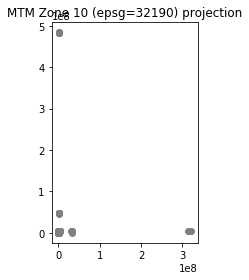

In [9]:
# Plot the WGS84
gdf_signs.plot(facecolor='gray');

# Add title
plt.title("MTM Zone 10 (epsg=32190) projection");

# Remove empty white space around the plot
plt.tight_layout()

# Plot the one with ETRS-LAEA projection
#data_proj.plot(facecolor='blue');

# Add title
#plt.title("ETRS Lambert Azimuthal Equal Area projection");

# Remove empty white space around the plot
#plt.tight_layout()

In [10]:
# Import the wards file

# File path
fpw = '../data/Wards_wgs84/icitw_wgs84.shp'


In [11]:
# Create the dataframe
gdf_wards = gpd.read_file(fpw)
gdf_wards.crs

{'init': 'epsg:4326'}

In [12]:
gdf_wards.head()

GEO_ID  CREATE_ID                          NAME SCODE_NAME LCODE_NAME  \
0  14630026      63519  Scarborough-Rouge River (41)         41       EA41   
1  14630028      63519         Scarborough East (44)         44       EA44   
2  14630024      63519  Scarborough-Rouge River (42)         42       EA42   
3  14630027      63519    Scarborough-Agincourt (39)         39       EA39   
4  14630035      63519               Willowdale (24)         24       NO24   

  TYPE_DESC TYPE_CODE  OBJECTID  SHAPE_AREA  SHAPE_LEN  \
0      Ward      CITW         1         0.0        0.0   
1      Ward      CITW         2         0.0        0.0   
2      Ward      CITW         3         0.0        0.0   
3      Ward      CITW         4         0.0        0.0   
4      Ward      CITW         5         0.0        0.0   

                                            geometry  
0  POLYGON ((-79.26485565927024 43.77955621985134...  
1  POLYGON ((-79.17076824694337 43.75563765091391...  
2  POLYGON ((-79.22568464642563 43.78940329829909...  
3  POLYGON ((-79.33141527345541 43.79311828976419...  
4  POLYGON ((-79.38719566413288 43.76348086985467...

In [13]:
gdf_wardproj = gdf_wards.to_crs(gdf_signs.crs)
gdf_wardproj.crs

{'init': 'epsg:32190', 'no_defs': True}

In [14]:
print(gdf_wardproj.shape)
print(gdf_wardproj.head())

(44, 11)
     GEO_ID  CREATE_ID                          NAME SCODE_NAME LCODE_NAME  \
0  14630026      63519  Scarborough-Rouge River (41)         41       EA41   
1  14630028      63519         Scarborough East (44)         44       EA44   
2  14630024      63519  Scarborough-Rouge River (42)         42       EA42   
3  14630027      63519    Scarborough-Agincourt (39)         39       EA39   
4  14630035      63519               Willowdale (24)         24       NO24   

  TYPE_DESC TYPE_CODE  OBJECTID  SHAPE_AREA  SHAPE_LEN  \
0      Ward      CITW         1         0.0        0.0   
1      Ward      CITW         2         0.0        0.0   
2      Ward      CITW         3         0.0        0.0   
3      Ward      CITW         4         0.0        0.0   
4      Ward      CITW         5         0.0        0.0   

                                            geometry  
0  POLYGON ((323727.8313023802 4848870.781534879,...  
1  POLYGON ((331311.9180867801 4846239.315869188,...  
2  POLYG

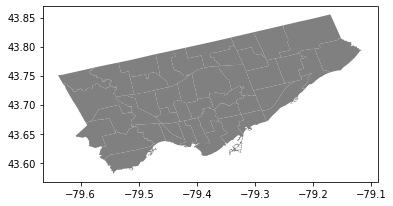

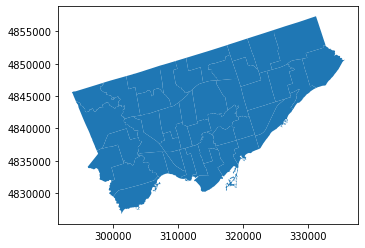

In [15]:
gdf_wards.plot(facecolor='gray')
gdf_wardproj.plot()

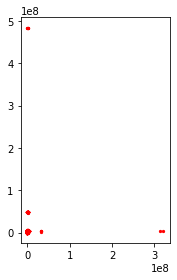

In [16]:
fig, ax = plt.subplots()

gdf_wardproj.plot(ax=ax, facecolor='gray');

gdf_signs.plot(ax=ax, color='red', markersize=5);

plt.tight_layout();

In [17]:
shapely.speedups.enable()

In [18]:
# Let's focus only on the signs that appear in the wards
gdf_signs['Ward_Found'] = None

for index, row in gdf_wardproj.iterrows():
    point_in_ward = gdf_signs.within(gdf_wardproj.loc[index, 'geometry'])
    gdf_signs.loc[point_in_ward, 'Ward_Found'] = gdf_wardproj.loc[index, 'SCODE_NAME']

gdf_found_signs = gdf_signs[~gdf_signs['Ward_Found'].isnull()]

In [19]:
gdf_found_signs.shape

(4008, 17)

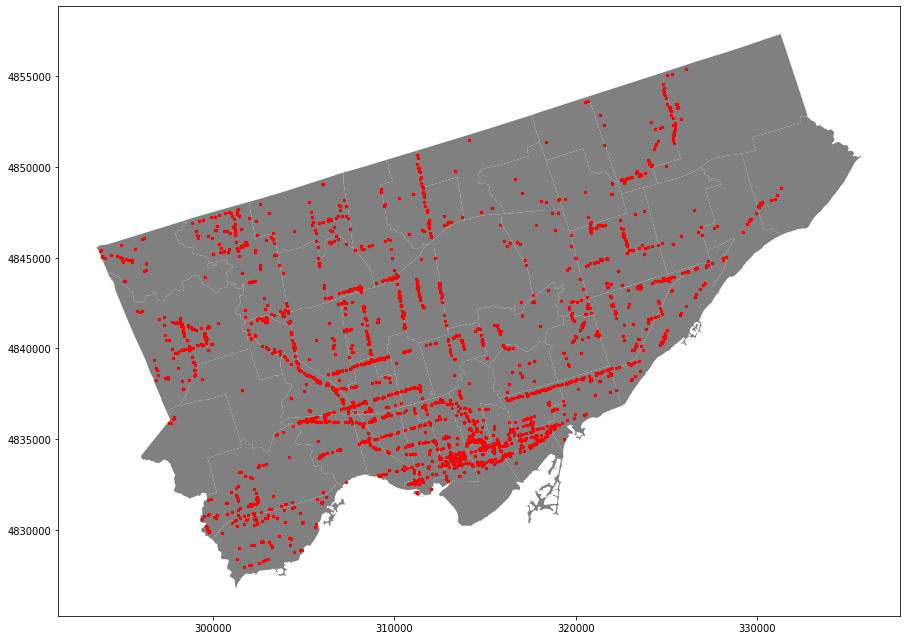

In [20]:
fig, ax = plt.subplots(figsize=(16,9))

gdf_wardproj.plot(ax=ax, facecolor='gray');

gdf_found_signs.plot(ax=ax, color='red', markersize=5);

plt.tight_layout();

### KSI Data

In [21]:
# KSI data

# File path
fp_ksi = '../data/KSIData/KSI.csv'

In [22]:
# Create dataframe
df_ksi = pd.read_csv(fp_ksi)
df_ksi.head()

X          Y    Index_      ACCNUM  YEAR                      DATE  \
0 -79.454730  43.675280  80771254  7001005616  2017  2017-06-03T04:00:00.000Z   
1 -79.520641  43.770049  80783528  7001744141  2017  2017-09-25T04:00:00.000Z   
2 -79.520641  43.770049  80783529  7001744141  2017  2017-09-25T04:00:00.000Z   
3 -79.286601  43.751868  80790062  7003112978  2017  2017-12-01T05:00:00.000Z   
4 -79.286601  43.751868  80790894  7003112978  2017  2017-12-01T05:00:00.000Z   

   TIME  Hour         STREET1        STREET2  ... AG_DRIV REDLIGHT ALCOHOL  \
0  2330    23  ST CLAIR AVE W   CALEDONIA RD  ...     Yes                    
1  2330    23    4673 JANE ST                 ...     Yes                    
2  2330    23    4673 JANE ST                 ...     Yes                    
3  2330    23   BIRCHMOUNT RD  MERRYFIELD DR  ...                            
4  2330    23   BIRCHMOUNT RD  MERRYFIELD DR  ...                            

   DISABILITY  Division Ward_Name Ward_ID Hood_ID Hood_Name ObjectId  
0                    13       NaN     NaN      92       NaN    12001  
1                    31       NaN     NaN      24       NaN    12002  
2                    31       NaN     NaN      24       NaN    12003  
3                    41       NaN     NaN     126       NaN    12004  
4                    41       NaN     NaN     126       NaN    12005  

[5 rows x 57 columns]

In [23]:
# In order to create a GeoDataFrame object from the text file, 
# create a column to store the shapely geometries
df_ksi['geometry'] = None

In [24]:
# Create the Point objects in the geometry column
for index, row in df_ksi.iterrows():
    df_ksi.loc[index,'geometry'] = Point(row['X'], row['Y'])
    

In [25]:
df_ksi.head()

X          Y    Index_      ACCNUM  YEAR                      DATE  \
0 -79.454730  43.675280  80771254  7001005616  2017  2017-06-03T04:00:00.000Z   
1 -79.520641  43.770049  80783528  7001744141  2017  2017-09-25T04:00:00.000Z   
2 -79.520641  43.770049  80783529  7001744141  2017  2017-09-25T04:00:00.000Z   
3 -79.286601  43.751868  80790062  7003112978  2017  2017-12-01T05:00:00.000Z   
4 -79.286601  43.751868  80790894  7003112978  2017  2017-12-01T05:00:00.000Z   

   TIME  Hour         STREET1        STREET2  ... REDLIGHT ALCOHOL DISABILITY  \
0  2330    23  ST CLAIR AVE W   CALEDONIA RD  ...                               
1  2330    23    4673 JANE ST                 ...                               
2  2330    23    4673 JANE ST                 ...                               
3  2330    23   BIRCHMOUNT RD  MERRYFIELD DR  ...                               
4  2330    23   BIRCHMOUNT RD  MERRYFIELD DR  ...                               

   Division  Ward_Name Ward_ID Hood_ID Hood_Name ObjectId  \
0        13        NaN     NaN      92       NaN    12001   
1        31        NaN     NaN      24       NaN    12002   
2        31        NaN     NaN      24       NaN    12003   
3        41        NaN     NaN     126       NaN    12004   
4        41        NaN     NaN     126       NaN    12005   

                       geometry  
0    POINT (-79.45473 43.67528)  
1  POINT (-79.520641 43.770049)  
2  POINT (-79.520641 43.770049)  
3  POINT (-79.286601 43.751868)  
4  POINT (-79.286601 43.751868)  

[5 rows x 58 columns]

In [26]:
# Convert the dataframe into a GeoDataFrame epsg=4326 (for WGS84)
gdf_ksi = gpd.GeoDataFrame(df_ksi, geometry='geometry', crs=from_epsg(4326))
gdf_ksi.crs

{'init': 'epsg:4326', 'no_defs': True}

In [27]:
gdf_ksiproj = gdf_ksi.to_crs(gdf_signs.crs)
gdf_ksiproj.crs

{'init': 'epsg:32190', 'no_defs': True}

In [28]:
print(gdf_ksiproj.shape)
print(gdf_ksiproj.head())

(12244, 58)
           X          Y    Index_      ACCNUM  YEAR                      DATE  \
0 -79.454730  43.675280  80771254  7001005616  2017  2017-06-03T04:00:00.000Z   
1 -79.520641  43.770049  80783528  7001744141  2017  2017-09-25T04:00:00.000Z   
2 -79.520641  43.770049  80783529  7001744141  2017  2017-09-25T04:00:00.000Z   
3 -79.286601  43.751868  80790062  7003112978  2017  2017-12-01T05:00:00.000Z   
4 -79.286601  43.751868  80790894  7003112978  2017  2017-12-01T05:00:00.000Z   

   TIME  Hour         STREET1        STREET2  ... REDLIGHT ALCOHOL DISABILITY  \
0  2330    23  ST CLAIR AVE W   CALEDONIA RD  ...                               
1  2330    23    4673 JANE ST                 ...                               
2  2330    23    4673 JANE ST                 ...                               
3  2330    23   BIRCHMOUNT RD  MERRYFIELD DR  ...                               
4  2330    23   BIRCHMOUNT RD  MERRYFIELD DR  ...                               

   Division  W

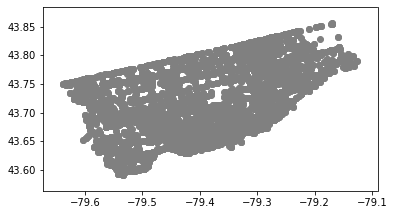

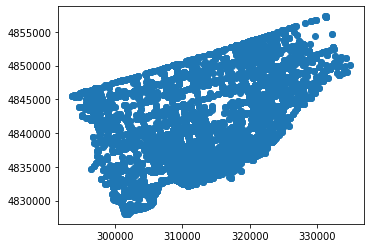

In [29]:
gdf_ksi.plot(facecolor='gray')
gdf_ksiproj.plot()

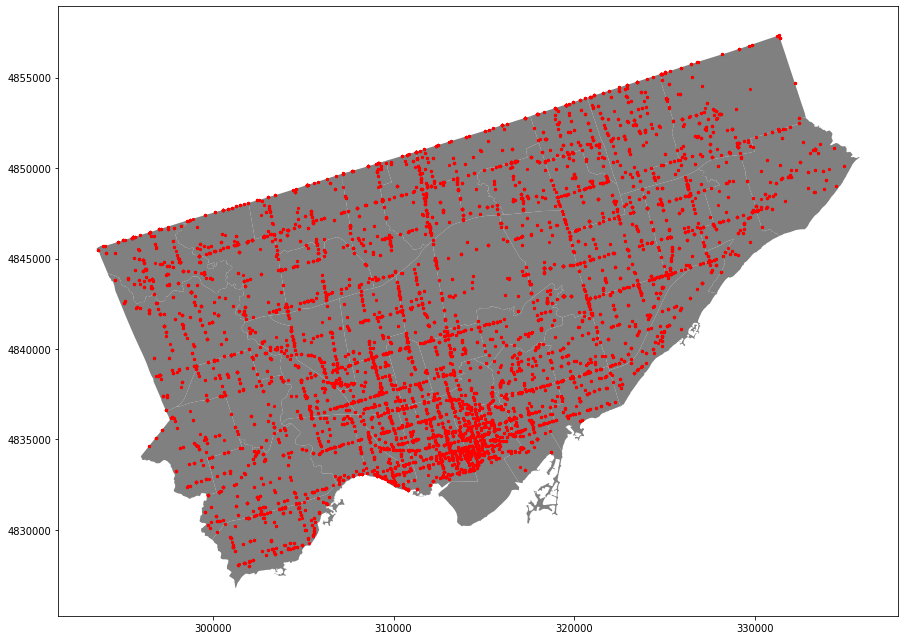

In [30]:
fig, ax = plt.subplots(figsize=(16,9))

gdf_wardproj.plot(ax=ax, facecolor='gray');

gdf_ksiproj.plot(ax=ax, color='red', markersize=5);

plt.tight_layout();

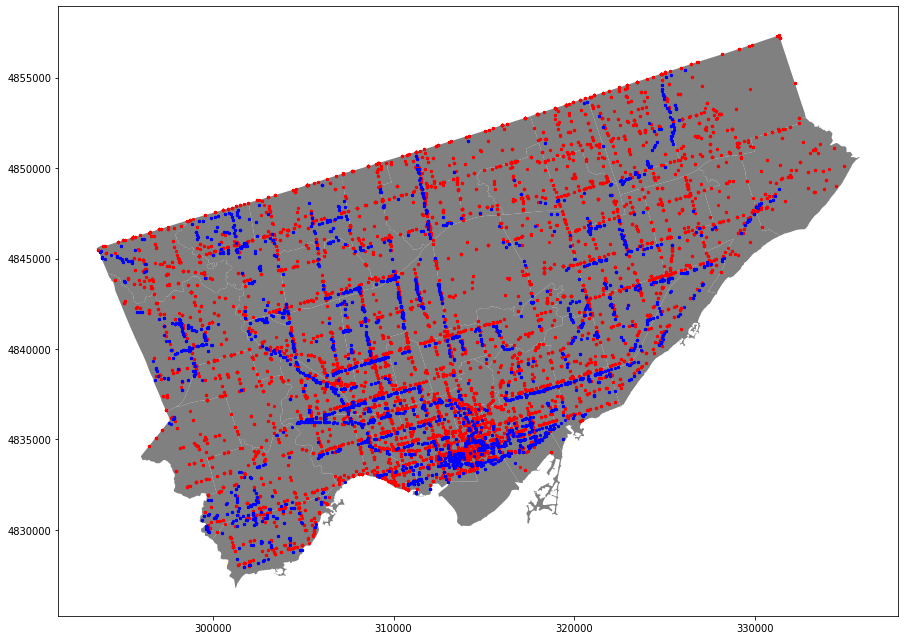

In [31]:
# Combine the KSI and sign data onto the map
fig, ax = plt.subplots(figsize=(16,9))

gdf_wardproj.plot(ax=ax, facecolor='gray');

gdf_ksiproj.plot(ax=ax, color='red', markersize=5);
gdf_found_signs.plot(ax=ax, color='blue', markersize=5);

plt.tight_layout();

### Demographic Data from SimplyAnalytics

In [32]:
# Import the demographic shapefile

# File path
fp_dem = '../data/CensusData/SimplyAnalytics_Shapefiles_2019-08-04_22_04_58_29ee95b93fb0808302bdd375a72e2de5.shp'

In [33]:
# Create the Geopandas dataframe
gdf_dem = gpd.read_file(fp_dem)
gdf_dem.shape

(572, 11)

In [34]:
gdf_dem.head()

spatial_id                    name  VALUE0  VALUE1  VALUE2  VALUE3  VALUE4  \
0  5350001.00  CT0001.00, Toronto, ON   249.0   600.0    76.0    34.0   515.0   
1  5350002.00  CT0002.00, Toronto, ON   267.0   613.0     2.0    77.0   522.0   
2  5350003.00  CT0003.00, Toronto, ON   537.0  1557.0     0.0   242.0   911.0   
3  5350004.00  CT0004.00, Toronto, ON  3712.0  7177.0   739.0   702.0  6139.0   
4  5350005.00  CT0005.00, Toronto, ON  3722.0  6969.0   586.0   648.0  6045.0   

   VALUE5        VALUE6      VALUE7  \
0   600.0  2.359562e+07  94761.5382   
1   581.0  1.630873e+07  61081.3885   
2  1001.0  4.888142e+07  91026.8574   
3  6827.0  1.598141e+08  43053.3590   
4  6645.0  1.946197e+08  52289.0033   

                                            geometry  
0  POLYGON ((-79.30312052680827 43.6557792424362,...  
1  POLYGON ((-79.34874705621597 43.63005940385361...  
2  POLYGON ((-79.43442817686808 43.63362770070954...  
3  POLYGON ((-79.43602519603924 43.63716951121133...  
4  POLYGON ((-79.42457648823653 43.64104908625342...

In [35]:
# Rename the VALUE columns
colnames = {'VALUE0': 'Total_Household_Count',\
           'VALUE1': 'Total_Population_Count',\
           'VALUE2': 'Total_No_PS_Education_Count',\
           'VALUE3': 'Total_PS_Education_Count',\
           'VALUE4': 'Total_Marital_Status_Count',\
           'VALUE5': 'Total_Household_Immigrants_Count',\
           'VALUE6': 'Total_Current_Consumption_Dollars',\
           'VALUE7': 'Avg_Current_Consumption_Dollars'}
gdf_dem = gdf_dem.rename(columns=colnames)
gdf_dem.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 11 columns):
spatial_id                           572 non-null object
name                                 572 non-null object
Total_Household_Count                572 non-null float64
Total_Population_Count               572 non-null float64
Total_No_PS_Education_Count          572 non-null float64
Total_PS_Education_Count             572 non-null float64
Total_Marital_Status_Count           572 non-null float64
Total_Household_Immigrants_Count     572 non-null float64
Total_Current_Consumption_Dollars    572 non-null float64
Avg_Current_Consumption_Dollars      572 non-null float64
geometry                             572 non-null object
dtypes: float64(8), object(3)
memory usage: 49.3+ KB


In [36]:
gdf_dem.crs

{'init': 'epsg:4326'}

In [37]:
gdf_demproj = gdf_dem.to_crs(gdf_signs.crs)
gdf_demproj.crs

{'init': 'epsg:32190', 'no_defs': True}

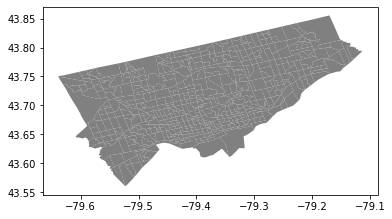

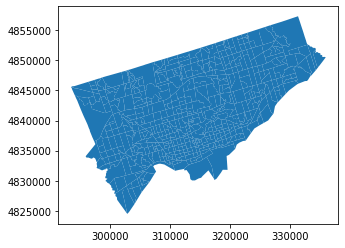

In [38]:
gdf_dem.plot(facecolor='gray')
gdf_demproj.plot()

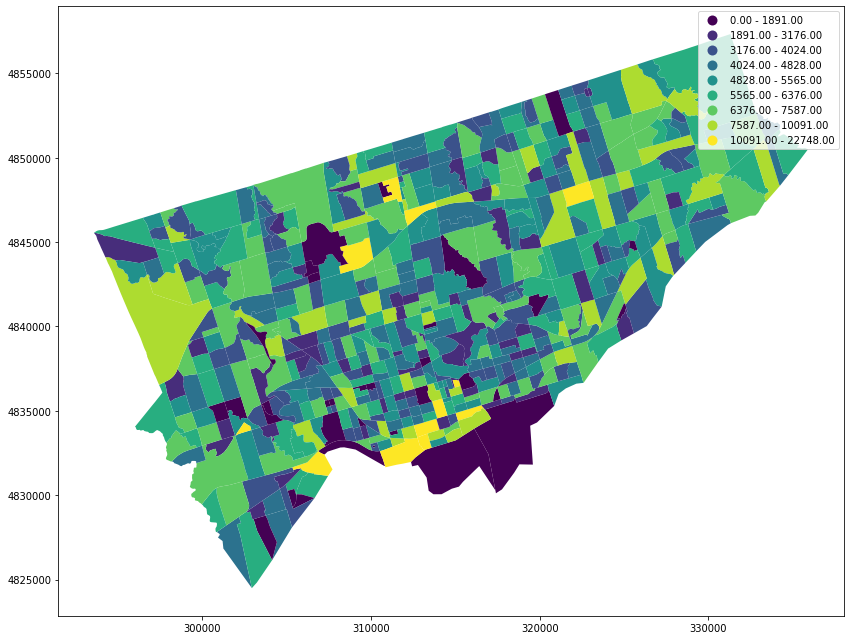

In [39]:
# View some demographic data as colour-coded map regions
# Total Population Count
gdf_demproj.plot(column="Total_Population_Count",\
                 figsize=(20,9), \
                 scheme="Natural_Breaks", \
                 k=9, \
                 #cmap="RdYlBu", \
                 linewidth=0, 
                 legend=True);

# Use tight layour
plt.tight_layout();

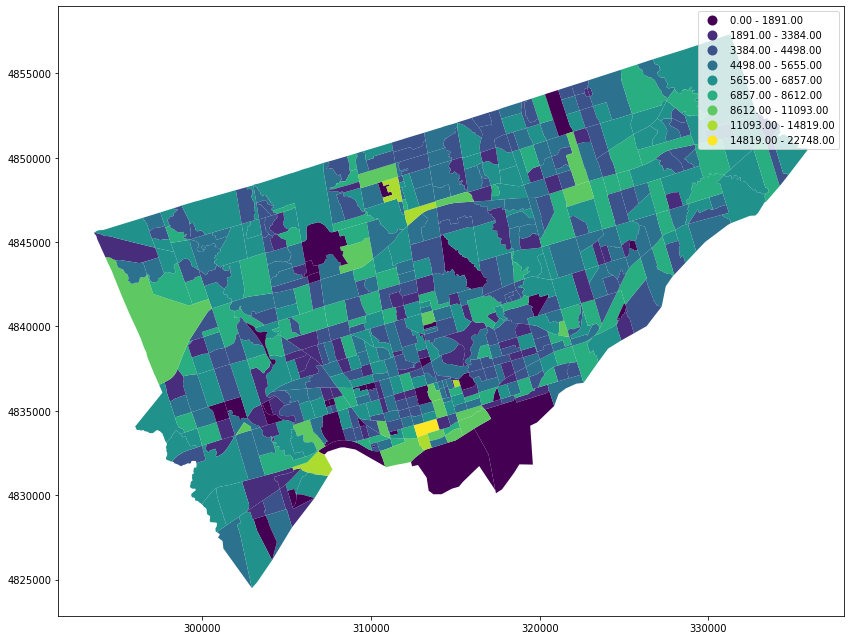

In [40]:
# View some demographic data as colour-coded map regions
# Total Population Count
gdf_demproj.plot(column="Total_Population_Count",\
                 figsize=(20,9), \
                 scheme="Fisher_Jenks", \
                 k=9, \
                 #cmap="RdYlBu", \
                 linewidth=0, 
                 legend=True);

# Use tight layour
plt.tight_layout();

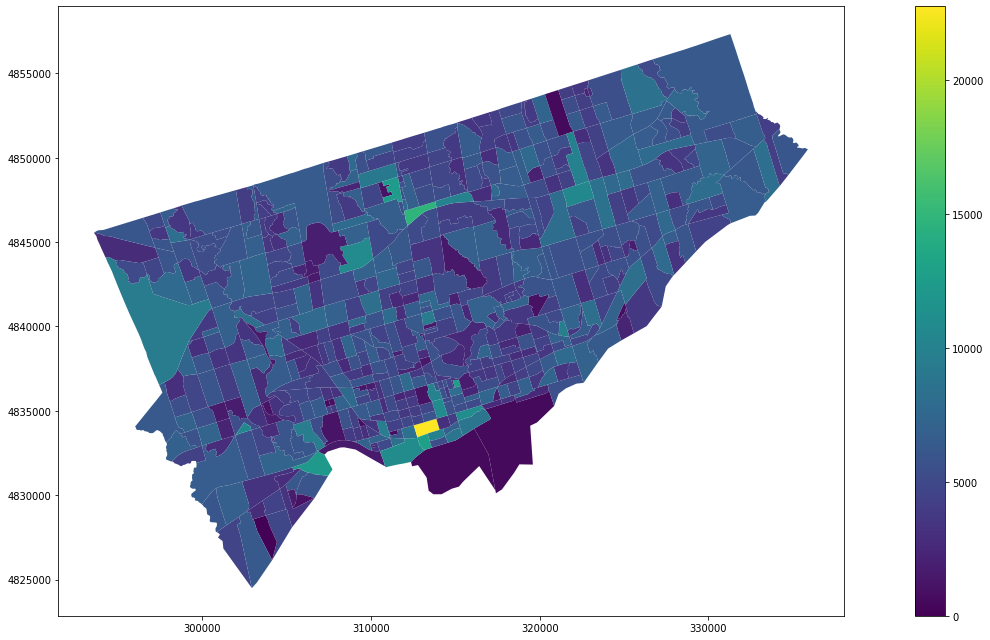

In [41]:
# View some demographic data as colour-coded map regions
# Total Population Count
gdf_demproj.plot(column="Total_Population_Count",\
                 figsize=(20,9), \
                 #scheme="Natural_Breaks", \
                 k=9, \
                 #cmap="RdYlBu", \
                 linewidth=0, 
                 legend=True);

# Use tight layour
plt.tight_layout();

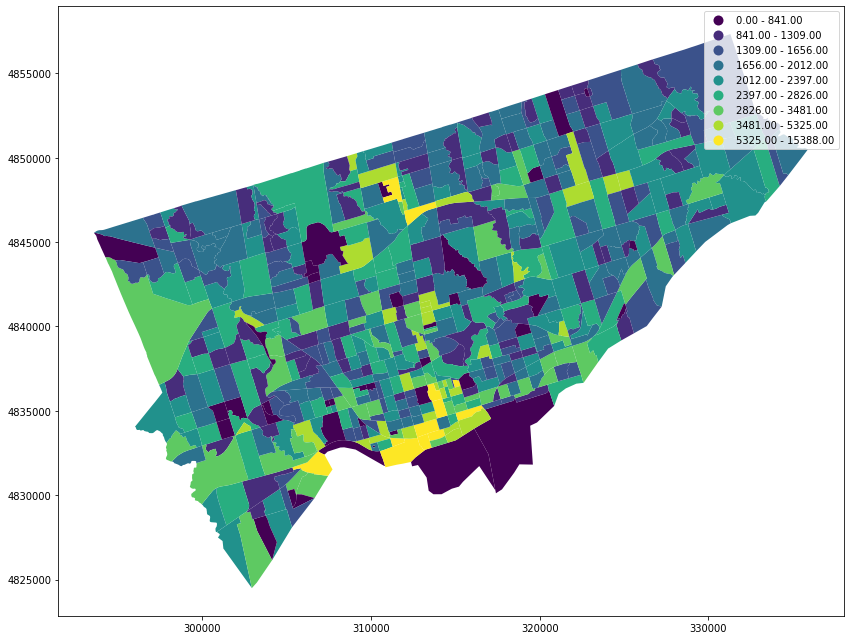

In [42]:
# View some demographic data as colour-coded map regions
# Total Household Count
gdf_demproj.plot(column="Total_Household_Count",\
                 figsize=(20,9), \
                 scheme="Natural_Breaks", \
                 k=9, \
                 #cmap="RdYlBu", \
                 linewidth=0, 
                 legend=True);

# Use tight layour
plt.tight_layout();

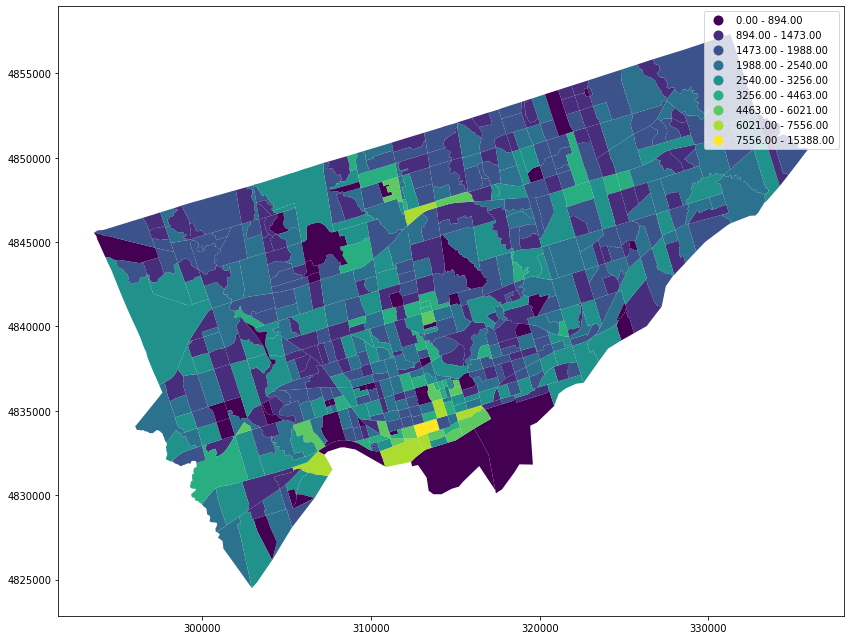

In [43]:
# View some demographic data as colour-coded map regions
# Total Household Count
gdf_demproj.plot(column="Total_Household_Count",\
                 figsize=(20,9), \
                 scheme="Fisher_Jenks", \
                 k=9, \
                 #cmap="RdYlBu", \
                 linewidth=0, 
                 legend=True);

# Use tight layour
plt.tight_layout();

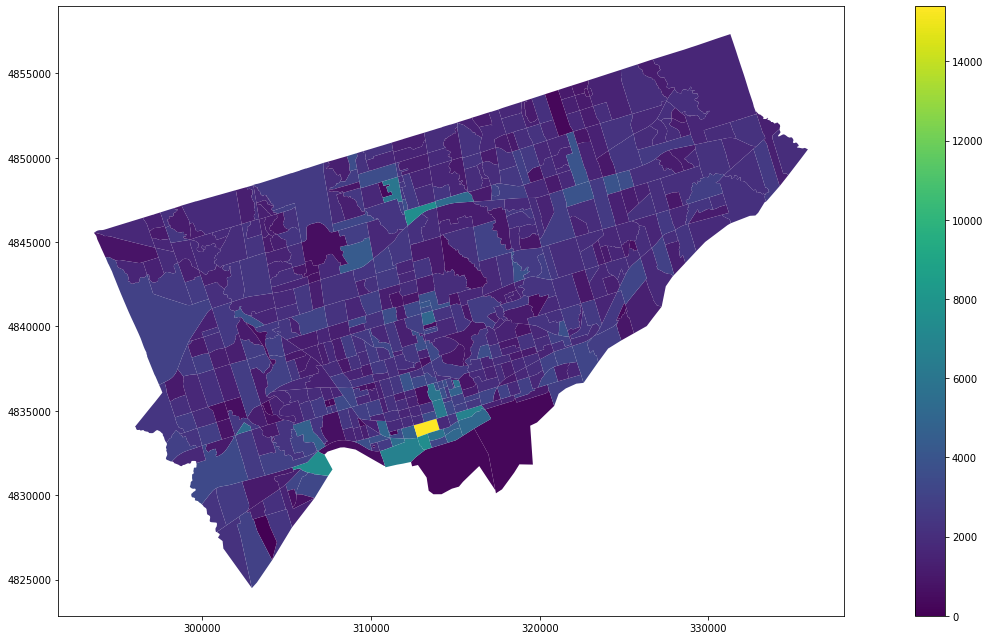

In [44]:
# View some demographic data as colour-coded map regions
# Total Household Count
gdf_demproj.plot(column="Total_Household_Count",\
                 figsize=(20,9), \
                 #scheme="Fisher_Jenks", \
                 k=9, \
                 #cmap="RdYlBu", \
                 linewidth=0, 
                 legend=True);

# Use tight layour
plt.tight_layout();

In [45]:
gdf_demproj[gdf_demproj['Total_Household_Count']>14000]

spatial_id                    name  Total_Household_Count  \
13  5350011.00  CT0011.00, Toronto, ON                15388.0   

    Total_Population_Count  Total_No_PS_Education_Count  \
13                 22748.0                        337.0   

    Total_PS_Education_Count  Total_Marital_Status_Count  \
13                    5687.0                     21919.0   

    Total_Household_Immigrants_Count  Total_Current_Consumption_Dollars  \
13                           22593.0                       1.527668e+09   

    Avg_Current_Consumption_Dollars  \
13                       99276.5963   

                                             geometry  
13  POLYGON ((312812.4857335773 4833447.333568549,...

## TODO:

* need area of each demproj region
* get pop by area, signs by area, accidents by area
* find population density dataset
* find population wealth dispersment
* find housing statistics maybe?
* do various overlays and make observations
* consider drill-down charts by ward
* do the hbar chart for ksi accident types by ward (code below from Spatial Clustering tutorial)

In [46]:
# Add an Area field to the demproj table for further calculations
# NOTE - MTM unit of measure is metres, so convert to Km2 for further analysis
gdf_demproj['Area'] = None
gdf_demproj['Area'] = gdf_demproj['geometry'].area / (1000 * 1000)
gdf_demproj.head()

spatial_id                    name  Total_Household_Count  \
0  5350001.00  CT0001.00, Toronto, ON                  249.0   
1  5350002.00  CT0002.00, Toronto, ON                  267.0   
2  5350003.00  CT0003.00, Toronto, ON                  537.0   
3  5350004.00  CT0004.00, Toronto, ON                 3712.0   
4  5350005.00  CT0005.00, Toronto, ON                 3722.0   

   Total_Population_Count  Total_No_PS_Education_Count  \
0                   600.0                         76.0   
1                   613.0                          2.0   
2                  1557.0                          0.0   
3                  7177.0                        739.0   
4                  6969.0                        586.0   

   Total_PS_Education_Count  Total_Marital_Status_Count  \
0                      34.0                       515.0   
1                      77.0                       522.0   
2                     242.0                       911.0   
3                     702.0                      6139.0   
4                     648.0                      6045.0   

   Total_Household_Immigrants_Count  Total_Current_Consumption_Dollars  \
0                             600.0                       2.359562e+07   
1                             581.0                       1.630873e+07   
2                            1001.0                       4.888142e+07   
3                            6827.0                       1.598141e+08   
4                            6645.0                       1.946197e+08   

   Avg_Current_Consumption_Dollars  \
0                       94761.5382   
1                       61081.3885   
2                       91026.8574   
3                       43053.3590   
4                       52289.0033   

                                            geometry       Area  
0  POLYGON ((320680.3743114723 4835111.663189559,...  13.453400  
1  POLYGON ((317005.3262185335 4832246.620448819,...  10.289987  
2  POLYGON ((310090.9919327127 4832634.009787658,...   1.751794  
3  POLYGON ((309961.8252407954 4833027.383222284,...   0.343402  
4  POLYGON ((310885.1759646178 4833459.156552648,...   0.376046

In [47]:
# Determine the demproj spatial_id of each sign in Toronto
gdf_signs['spatial_id'] = None

for index, row in gdf_demproj.iterrows():
    point_in_dem = gdf_signs.within(gdf_demproj.loc[index, 'geometry'])
    gdf_signs.loc[point_in_dem, 'spatial_id'] = gdf_demproj.loc[index, 'spatial_id']

#gdf_found_signs = gdf_signs[~gdf_signs['Ward_Found'].isnull()]
gdf_signs.head()

Sign Account Street Number  Street Name Size (LxW)  \
0       44-001     4566-4568  KINGSTON RD    10 x 20   
1       44-001     4566-4568  KINGSTON RD    10 x 20   
2       44-002          4528  KINGSTON RD    10 x 20   
3       44-002          4528  KINGSTON RD    10 x 20   
4       44-002          4528  KINGSTON RD    10 x 20   

                Location Description (if no address)  X Coordinate  \
0  On Kingston Rd. between Military Trail & Morni...     330183.18   
1  On Kingston Rd. between Military Trail & Morni...     330184.17   
2  On Kingston Rd. between Military Trail & Morni...     330055.54   
3  On Kingston Rd. between Military Trail & Morni...     330059.83   
4  On Kingston Rd. between Military Trail & Morni...     330061.23   

   Y Coordinate Sign Type Sign Technology Sign Face Direction Illumination  \
0    4848008.89    Ground          STATIC                   W         Down   
1    4848001.36    Ground          STATIC                   E         Down   
2    4847844.62      Roof          STATIC                  NE           Up   
3    4847841.82      Roof          STATIC                  NE           Up   
4    4847842.89      Roof          STATIC                  SW           Up   

  Sign Owner Sign Owner Identifier  \
0   PATTISON                 5364A   
1   PATTISON                 5364B   
2        CBS                  1633   
3        CBS                  1634   
4        CBS                  1631   

                           Context Picture Hyperlink  Ward_ID  \
0  http://maps.live.com/default.aspx?v=2&FORM=LML...       44   
1  http://maps.live.com/default.aspx?v=2&FORM=LML...       44   
2  http://maps.live.com/default.aspx?v=2&FORM=LML...       44   
3  http://maps.live.com/default.aspx?v=2&FORM=LML...       44   
4  http://maps.live.com/default.aspx?v=2&FORM=LML...       44   

                       geometry Ward_Found  spatial_id  
0  POINT (330183.18 4848008.89)         44  5350359.00  
1  POINT (330184.17 4848001.36)         44  5350359.00  
2  POINT (330055.54 4847844.62)         44  5350359.00  
3  POINT (330059.83 4847841.82)         44  5350359.00  
4  POINT (330061.23 4847842.89)         44  5350359.00

In [48]:
# Determine the demproj spatial_id of each KSI point in Toronto
gdf_ksiproj['spatial_id'] = None

for index, row in gdf_demproj.iterrows():
    point_in_dem = gdf_ksiproj.within(gdf_demproj.loc[index, 'geometry'])
    gdf_ksiproj.loc[point_in_dem, 'spatial_id'] = gdf_demproj.loc[index, 'spatial_id']

#gdf_found_signs = gdf_signs[~gdf_signs['Ward_Found'].isnull()]
gdf_ksiproj.head()

X          Y    Index_      ACCNUM  YEAR                      DATE  \
0 -79.454730  43.675280  80771254  7001005616  2017  2017-06-03T04:00:00.000Z   
1 -79.520641  43.770049  80783528  7001744141  2017  2017-09-25T04:00:00.000Z   
2 -79.520641  43.770049  80783529  7001744141  2017  2017-09-25T04:00:00.000Z   
3 -79.286601  43.751868  80790062  7003112978  2017  2017-12-01T05:00:00.000Z   
4 -79.286601  43.751868  80790894  7003112978  2017  2017-12-01T05:00:00.000Z   

   TIME  Hour         STREET1        STREET2  ... ALCOHOL DISABILITY Division  \
0  2330    23  ST CLAIR AVE W   CALEDONIA RD  ...                          13   
1  2330    23    4673 JANE ST                 ...                          31   
2  2330    23    4673 JANE ST                 ...                          31   
3  2330    23   BIRCHMOUNT RD  MERRYFIELD DR  ...                          41   
4  2330    23   BIRCHMOUNT RD  MERRYFIELD DR  ...                          41   

   Ward_Name  Ward_ID Hood_ID Hood_Name ObjectId  \
0        NaN      NaN      92       NaN    12001   
1        NaN      NaN      24       NaN    12002   
2        NaN      NaN      24       NaN    12003   
3        NaN      NaN     126       NaN    12004   
4        NaN      NaN     126       NaN    12005   

                                      geometry  spatial_id  
0    POINT (308450.313492727 4837260.25309587)  5350110.00  
1  POINT (303138.2495327648 4847787.894378964)  5350316.04  
2  POINT (303138.2495327648 4847787.894378964)  5350316.04  
3   POINT (321985.374990024 4845789.974195491)  5350371.00  
4   POINT (321985.374990024 4845789.974195491)  5350371.00  

[5 rows x 59 columns]

In [56]:
# Add a column to the demographic dataframe to track the total number of signs in each region
gdf_demproj['Total_Sign_Count'] = None 

for index, row in gdf_demproj.iterrows():
    gdf_demproj.loc[index, 'Total_Sign_Count'] = gdf_signs.loc[gdf_signs['spatial_id']==row['spatial_id'],'spatial_id'].count()

gdf_demproj.head()

spatial_id                    name  Total_Household_Count  \
0  5350001.00  CT0001.00, Toronto, ON                  249.0   
1  5350002.00  CT0002.00, Toronto, ON                  267.0   
2  5350003.00  CT0003.00, Toronto, ON                  537.0   
3  5350004.00  CT0004.00, Toronto, ON                 3712.0   
4  5350005.00  CT0005.00, Toronto, ON                 3722.0   

   Total_Population_Count  Total_No_PS_Education_Count  \
0                   600.0                         76.0   
1                   613.0                          2.0   
2                  1557.0                          0.0   
3                  7177.0                        739.0   
4                  6969.0                        586.0   

   Total_PS_Education_Count  Total_Marital_Status_Count  \
0                      34.0                       515.0   
1                      77.0                       522.0   
2                     242.0                       911.0   
3                     702.0                      6139.0   
4                     648.0                      6045.0   

   Total_Household_Immigrants_Count  Total_Current_Consumption_Dollars  \
0                             600.0                       2.359562e+07   
1                             581.0                       1.630873e+07   
2                            1001.0                       4.888142e+07   
3                            6827.0                       1.598141e+08   
4                            6645.0                       1.946197e+08   

   Avg_Current_Consumption_Dollars  \
0                       94761.5382   
1                       61081.3885   
2                       91026.8574   
3                       43053.3590   
4                       52289.0033   

                                            geometry       Area  \
0  POLYGON ((320680.3743114723 4835111.663189559,...  13.453400   
1  POLYGON ((317005.3262185335 4832246.620448819,...  10.289987   
2  POLYGON ((310090.9919327127 4832634.009787658,...   1.751794   
3  POLYGON ((309961.8252407954 4833027.383222284,...   0.343402   
4  POLYGON ((310885.1759646178 4833459.156552648,...   0.376046   

   Total_Sign_Count  
0                90  
1                 0  
2                 7  
3                 8  
4                10

In [57]:
# Add a column to the demographic dataframe to track the total number of traffic accidents in each region
gdf_demproj['Traffic_Accident_Count'] = None 

for index, row in gdf_demproj.iterrows():
    gdf_demproj.loc[index, 'Traffic_Accident_Count'] = gdf_ksiproj.loc[gdf_ksiproj['spatial_id']==row['spatial_id'],'spatial_id'].count()

gdf_demproj.head()

spatial_id                    name  Total_Household_Count  \
0  5350001.00  CT0001.00, Toronto, ON                  249.0   
1  5350002.00  CT0002.00, Toronto, ON                  267.0   
2  5350003.00  CT0003.00, Toronto, ON                  537.0   
3  5350004.00  CT0004.00, Toronto, ON                 3712.0   
4  5350005.00  CT0005.00, Toronto, ON                 3722.0   

   Total_Population_Count  Total_No_PS_Education_Count  \
0                   600.0                         76.0   
1                   613.0                          2.0   
2                  1557.0                          0.0   
3                  7177.0                        739.0   
4                  6969.0                        586.0   

   Total_PS_Education_Count  Total_Marital_Status_Count  \
0                      34.0                       515.0   
1                      77.0                       522.0   
2                     242.0                       911.0   
3                     702.0                      6139.0   
4                     648.0                      6045.0   

   Total_Household_Immigrants_Count  Total_Current_Consumption_Dollars  \
0                             600.0                       2.359562e+07   
1                             581.0                       1.630873e+07   
2                            1001.0                       4.888142e+07   
3                            6827.0                       1.598141e+08   
4                            6645.0                       1.946197e+08   

   Avg_Current_Consumption_Dollars  \
0                       94761.5382   
1                       61081.3885   
2                       91026.8574   
3                       43053.3590   
4                       52289.0033   

                                            geometry       Area  \
0  POLYGON ((320680.3743114723 4835111.663189559,...  13.453400   
1  POLYGON ((317005.3262185335 4832246.620448819,...  10.289987   
2  POLYGON ((310090.9919327127 4832634.009787658,...   1.751794   
3  POLYGON ((309961.8252407954 4833027.383222284,...   0.343402   
4  POLYGON ((310885.1759646178 4833459.156552648,...   0.376046   

   Total_Sign_Count  Traffic_Accident_Count  
0                90                      68  
1                 0                       0  
2                 7                     135  
3                 8                      22  
4                10                      16

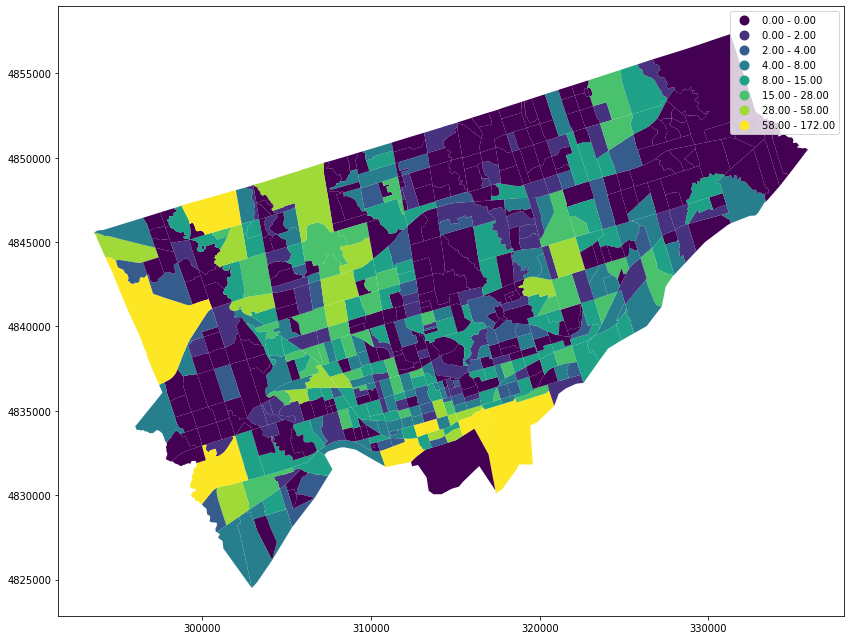

In [58]:
# View some demographic data as colour-coded map regions
# Total Sign Count
gdf_demproj.plot(column="Total_Sign_Count",\
                 figsize=(20,9), \
                 scheme="Natural_Breaks", \
                 k=9, \
                 #cmap="RdYlBu", \
                 linewidth=0, 
                 legend=True);

# Use tight layour
plt.tight_layout();

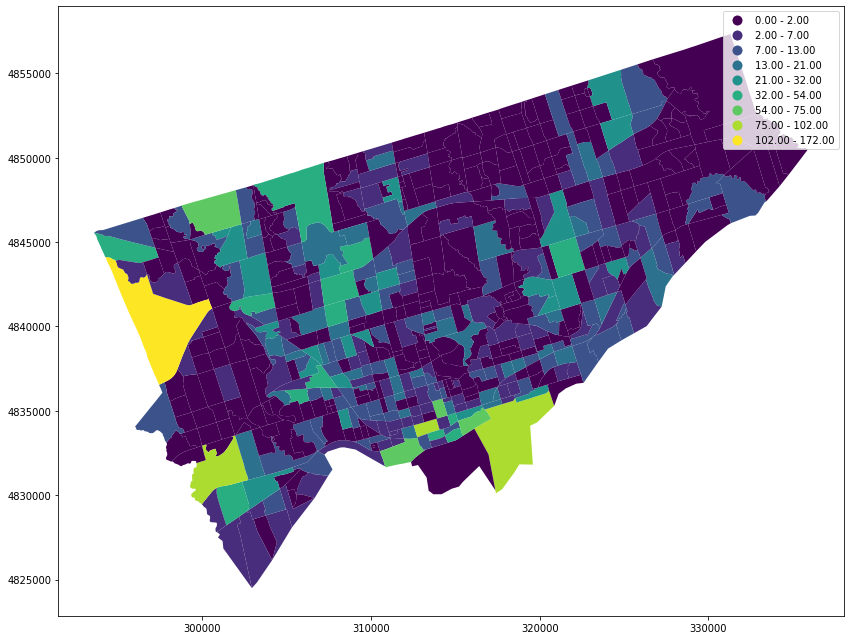

In [59]:
# View some demographic data as colour-coded map regions
# Total Sign Count
gdf_demproj.plot(column="Total_Sign_Count",\
                 figsize=(20,9), \
                 scheme="Fisher_Jenks", \
                 k=9, \
                 #cmap="RdYlBu", \
                 linewidth=0, 
                 legend=True);

# Use tight layour
plt.tight_layout();

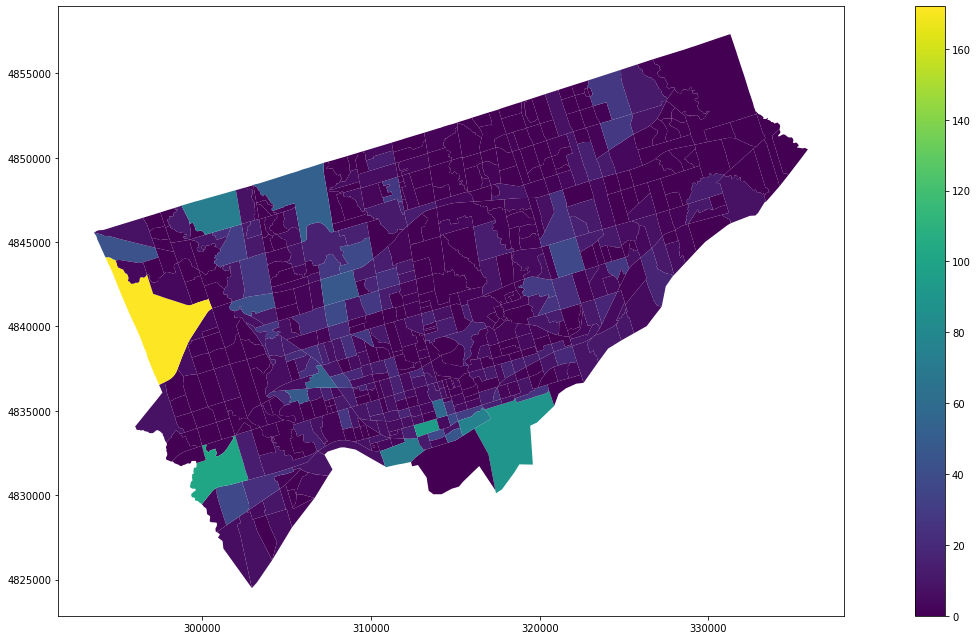

In [60]:
# View some demographic data as colour-coded map regions
# Total Sign Count
gdf_demproj.plot(column="Total_Sign_Count",\
                 figsize=(20,9), \
                 #scheme="Fisher_Jenks", \
                 k=9, \
                 #cmap="RdYlBu", \
                 linewidth=0, 
                 legend=True);

# Use tight layour
plt.tight_layout();

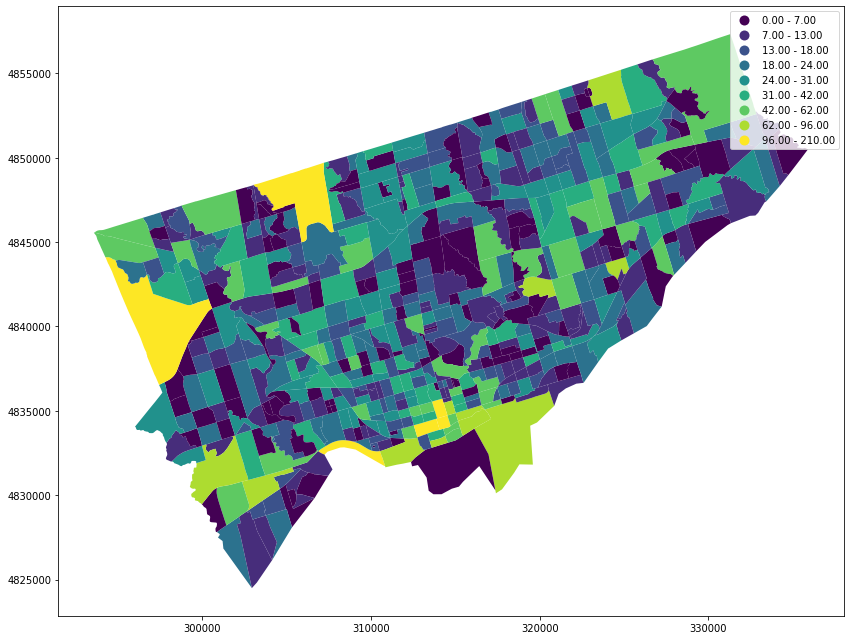

In [61]:
# View some demographic data as colour-coded map regions
# Traffic Accident Count
gdf_demproj.plot(column="Traffic_Accident_Count",\
                 figsize=(20,9), \
                 scheme="Natural_Breaks", \
                 k=9, \
                 #cmap="RdYlBu", \
                 linewidth=0, 
                 legend=True);

# Use tight layour
plt.tight_layout();

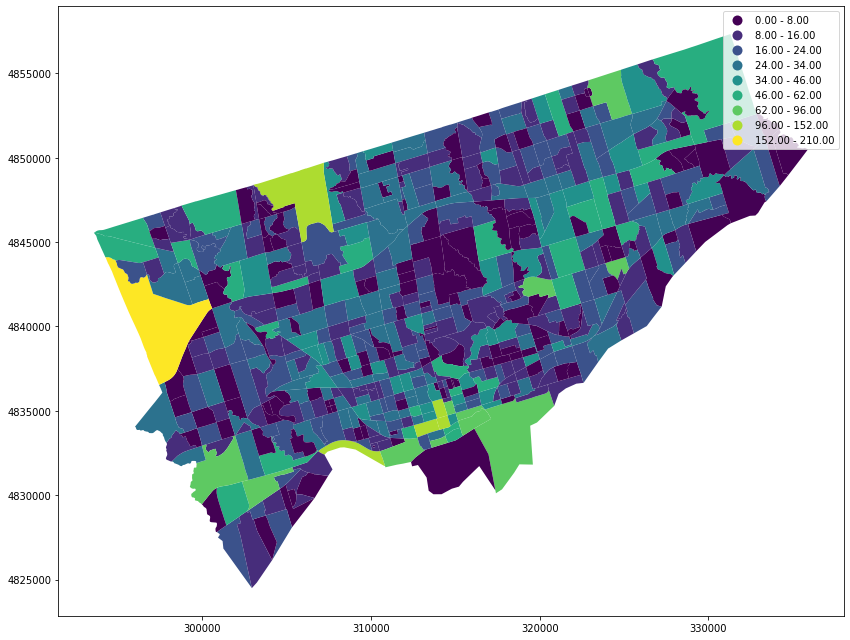

In [62]:
# View some demographic data as colour-coded map regions
# Traffic Accident Count
gdf_demproj.plot(column="Traffic_Accident_Count",\
                 figsize=(20,9), \
                 scheme="Fisher_Jenks", \
                 k=9, \
                 #cmap="RdYlBu", \
                 linewidth=0, 
                 legend=True);

# Use tight layour
plt.tight_layout();

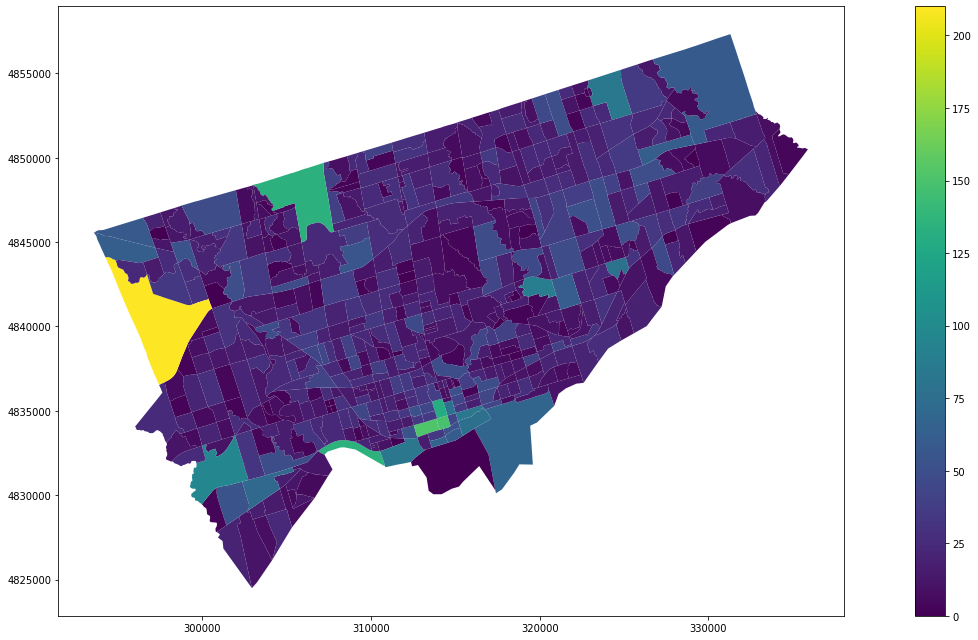

In [63]:
# View some demographic data as colour-coded map regions
# Traffic Accident Count
gdf_demproj.plot(column="Traffic_Accident_Count",\
                 figsize=(20,9), \
                 #scheme="Fisher_Jenks", \
                 k=9, \
                 #cmap="RdYlBu", \
                 linewidth=0, 
                 legend=True);

# Use tight layour
plt.tight_layout();

### Comparitive Analysis - Do Signs/Accidents Appear in Special Demographic Regions?

In [66]:
gdf_demproj.mean()

Total_Household_Count                2.096626e+03
Total_Population_Count               5.128080e+03
Total_No_PS_Education_Count          3.604021e+02
Total_PS_Education_Count             6.337745e+02
Total_Marital_Status_Count           4.324874e+03
Total_Household_Immigrants_Count     5.056486e+03
Total_Current_Consumption_Dollars    1.796879e+08
Avg_Current_Consumption_Dollars      9.027233e+04
Area                                 1.163883e+00
Total_Sign_Count                     7.017483e+00
Traffic_Accident_Count               2.124825e+01
dtype: float64

In [76]:
# Do signs appear where there is above average household count, population, or consumption?
gdf_demproj['Above_Avg_Household_Count'] = 0
gdf_demproj.loc[gdf_demproj['Total_Household_Count'] > gdf_demproj['Total_Household_Count'].mean(),\
                'Above_Avg_Household_Count'] = 1

gdf_demproj['Above_Avg_Population_Count'] = 0
gdf_demproj.loc[gdf_demproj['Total_Population_Count'] > gdf_demproj['Total_Population_Count'].mean(),\
                'Above_Avg_Population_Count'] = 1

gdf_demproj['Above_Avg_AvgConsumption_Dollars'] = 0
gdf_demproj.loc[gdf_demproj['Avg_Current_Consumption_Dollars'] > gdf_demproj['Avg_Current_Consumption_Dollars'].mean(),\
                'Above_Avg_AvgConsumption_Dollars'] = 1

gdf_demproj.head()

spatial_id                    name  Total_Household_Count  \
0  5350001.00  CT0001.00, Toronto, ON                  249.0   
1  5350002.00  CT0002.00, Toronto, ON                  267.0   
2  5350003.00  CT0003.00, Toronto, ON                  537.0   
3  5350004.00  CT0004.00, Toronto, ON                 3712.0   
4  5350005.00  CT0005.00, Toronto, ON                 3722.0   

   Total_Population_Count  Total_No_PS_Education_Count  \
0                   600.0                         76.0   
1                   613.0                          2.0   
2                  1557.0                          0.0   
3                  7177.0                        739.0   
4                  6969.0                        586.0   

   Total_PS_Education_Count  Total_Marital_Status_Count  \
0                      34.0                       515.0   
1                      77.0                       522.0   
2                     242.0                       911.0   
3                     702.0                      6139.0   
4                     648.0                      6045.0   

   Total_Household_Immigrants_Count  Total_Current_Consumption_Dollars  \
0                             600.0                       2.359562e+07   
1                             581.0                       1.630873e+07   
2                            1001.0                       4.888142e+07   
3                            6827.0                       1.598141e+08   
4                            6645.0                       1.946197e+08   

   Avg_Current_Consumption_Dollars  \
0                       94761.5382   
1                       61081.3885   
2                       91026.8574   
3                       43053.3590   
4                       52289.0033   

                                            geometry       Area  \
0  POLYGON ((320680.3743114723 4835111.663189559,...  13.453400   
1  POLYGON ((317005.3262185335 4832246.620448819,...  10.289987   
2  POLYGON ((310090.9919327127 4832634.009787658,...   1.751794   
3  POLYGON ((309961.8252407954 4833027.383222284,...   0.343402   
4  POLYGON ((310885.1759646178 4833459.156552648,...   0.376046   

   Total_Sign_Count  Traffic_Accident_Count  Above_Avg_Household_Count  \
0                90                      68                          0   
1                 0                       0                          0   
2                 7                     135                          0   
3                 8                      22                          1   
4                10                      16                          1   

   Above_Avg_Population_Count  Above_Avg_AvgConsumption_Dollars  
0                           0                                 1  
1                           0                                 0  
2                           0                                 1  
3                           1                                 0  
4                           1                                 0

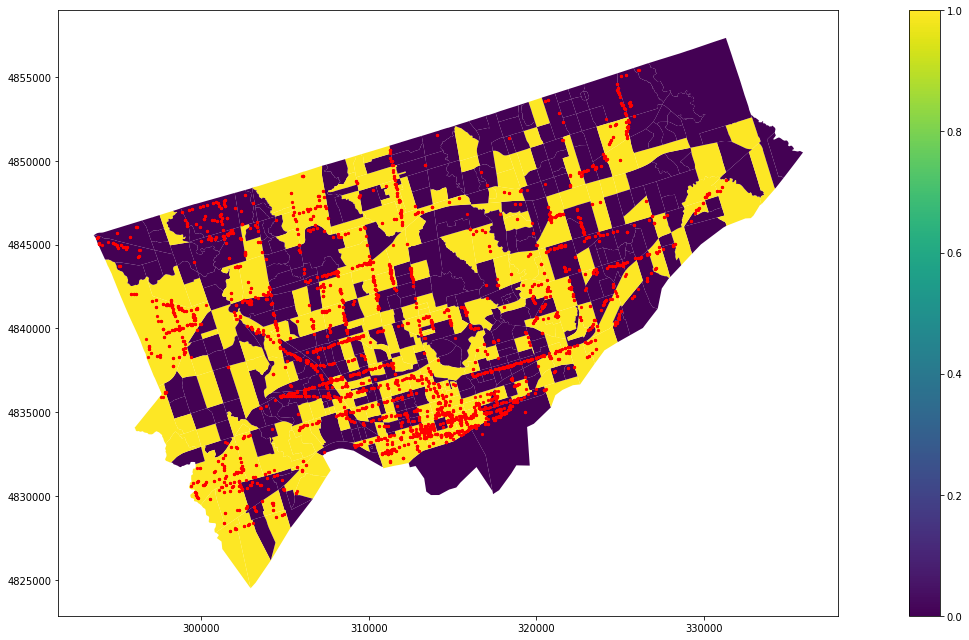

In [88]:
# Plot the signs on the above averate household map
fig, ax = plt.subplots(figsize=(20,9))

gdf_demproj.plot(ax=ax, \
                 column="Above_Avg_Household_Count",\
                 #figsize=(20,9), \
                 #scheme="Fisher_Jenks", \
                 k=9, \
                 #cmap="RdYlBu", \
                 linewidth=0, 
                 legend=True);
gdf_found_signs.plot(ax=ax, color='red', markersize=5);


plt.tight_layout();

In [97]:
total_signs = gdf_demproj['Total_Sign_Count'].sum()
total_signs_above_avg_households = gdf_demproj.loc[gdf_demproj['Above_Avg_Household_Count'] == 1,'Total_Sign_Count'].sum()
print('Total (plotted) signs in Toronto:  ', total_signs)
print('Total (plotted) signs found in areas with above average number of housholds:  ', total_signs_above_avg_households)
print('Percentage of total (plotted) signs:  ', total_signs_above_avg_households/total_signs)

Total (plotted) signs in Toronto:   4014
Total (plotted) signs found in areas with above average number of housholds:   2265
Percentage of total (plotted) signs:   0.5642750373692078


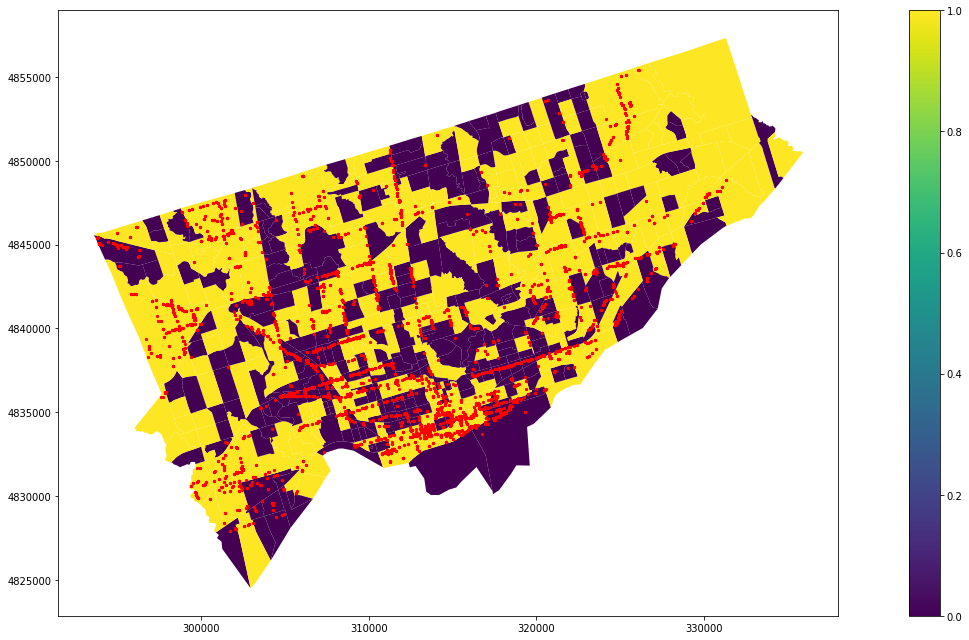

In [89]:
# Plot the signs on the above averate population map
fig, ax = plt.subplots(figsize=(20,9))

gdf_demproj.plot(ax=ax, \
                 column="Above_Avg_Population_Count",\
                 #figsize=(20,9), \
                 #scheme="Fisher_Jenks", \
                 k=9, \
                 #cmap="RdYlBu", \
                 linewidth=0, 
                 legend=True);
gdf_found_signs.plot(ax=ax, color='red', markersize=5);


plt.tight_layout();

In [98]:
total_signs = gdf_demproj['Total_Sign_Count'].sum()
total_signs_above_avg_pop = gdf_demproj.loc[gdf_demproj['Above_Avg_Population_Count'] == 1,'Total_Sign_Count'].sum()
print('Total (plotted) signs in Toronto:  ', total_signs)
print('Total (plotted) signs found in areas with above average population:  ', total_signs_above_avg_pop)
print('Percentage of total (plotted) signs:  ', total_signs_above_avg_pop/total_signs)

Total (plotted) signs in Toronto:   4014
Total (plotted) signs found in areas with above average population:   2463
Percentage of total (plotted) signs:   0.6136023916292974


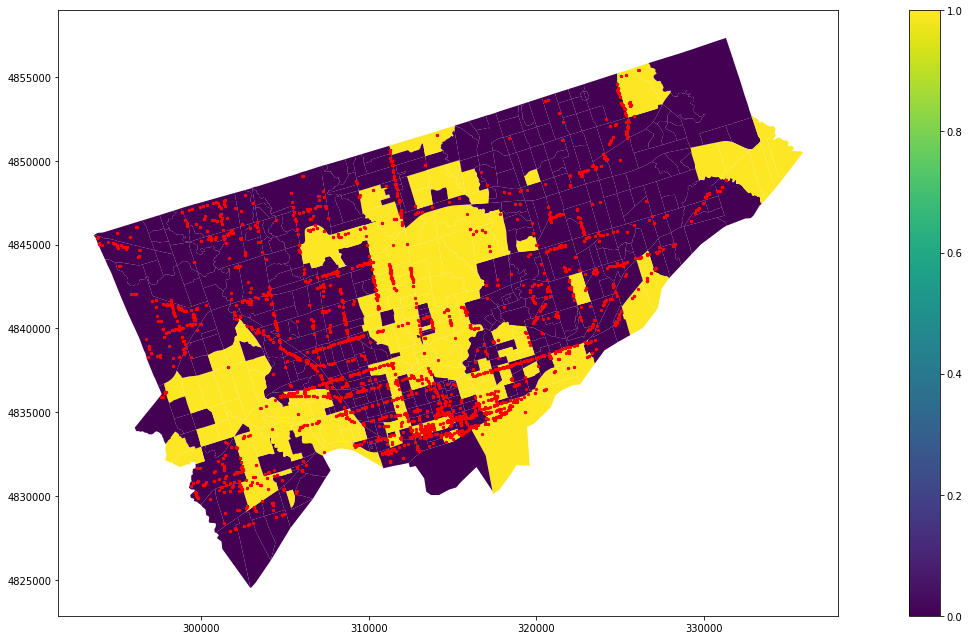

In [90]:
# Plot the signs on the above averate average consumption map
fig, ax = plt.subplots(figsize=(20,9))

gdf_demproj.plot(ax=ax, \
                 column="Above_Avg_AvgConsumption_Dollars",\
                 #figsize=(20,9), \
                 #scheme="Fisher_Jenks", \
                 k=9, \
                 #cmap="RdYlBu", \
                 linewidth=0, 
                 legend=True);
gdf_found_signs.plot(ax=ax, color='red', markersize=5);


plt.tight_layout();

In [99]:
total_signs = gdf_demproj['Total_Sign_Count'].sum()
total_signs_above_avg_consump = gdf_demproj.loc[gdf_demproj['Above_Avg_AvgConsumption_Dollars'] == 1,'Total_Sign_Count'].sum()
print('Total (plotted) signs in Toronto:  ', total_signs)
print('Total (plotted) signs found in areas with above average consumption:  ', total_signs_above_avg_consump)
print('Percentage of total (plotted) signs:  ', total_signs_above_avg_consump/total_signs)

Total (plotted) signs in Toronto:   4014
Total (plotted) signs found in areas with above average consumption:   1074
Percentage of total (plotted) signs:   0.26756352765321373
